<a href="https://colab.research.google.com/github/isaacbull/Data-Science-zikspot/blob/main/datascience_gboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
This Jupyter Notebook explores the application of Gradient Boosting Regression for predictive modeling, with a focus on understanding and visualizing feature importance.

We begin by illustrating a custom function for generating polynomial features, followed by demonstrating the same functionality using scikit-learn's PolynomialFeatures.

The core of the notebook involves building a Gradient Boosting Regressor model using the diabetes dataset from scikit-learn. We train the model, evaluate its performance using Mean Squared Error, and then delve into analyzing the importance of different features in driving the model's predictions.

Finally, we utilize Matplotlib to create a clear and informative visualization of feature importances, allowing for easy interpretation and understanding of the model's behavior.

This notebook serves as a practical guide to implementing and interpreting Gradient Boosting Regression models, emphasizing the importance of feature analysis in gaining insights from data.

In [1]:
import numpy as np

def polynomial_features(X, degree):
    """
    Creates polynomial features from a given feature matrix.

    Args:
        X: The input feature matrix.
        degree: The maximum degree of the polynomial features.

    Returns:
        The matrix of polynomial features.
    """

    n_samples, n_features = X.shape
    X_poly = np.zeros((n_samples, n_features * degree))

    for i in range(n_samples):
        for j in range(n_features):
            for d in range(1, degree + 1):
                X_poly[i, j * degree + d - 1] = X[i, j] ** d

    return X_poly

In [2]:
np.zeros??

In [5]:
np.zeros((2, 1)).shape

(2, 1)

In [6]:
range??

In [12]:
X = np.array([[1], [2], [3]])
degree = 2
print(f"first x: \n {X}\n")
print(f"the shape of X: {X.shape}\n")

X_poly = polynomial_features(X, degree)
print(f"Now X_poly: \n {X_poly}\n")
print(f"X_poly's Shape: {X_poly.shape}")



first x: 
 [[1]
 [2]
 [3]]

the shape of X: (3, 1)

Now X_poly: 
 [[1. 1.]
 [2. 4.]
 [3. 9.]]

X_poly's Shape: (3, 2)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)

Mean Squared Error: 2898.4366729135227
Feature Importances:
Feature 0: 0.049612188674545706
Feature 1: 0.012478098996102931
Feature 2: 0.3931012506899421
Feature 3: 0.08297928741962607
Feature 4: 0.03889154250260649
Feature 5: 0.06148978682724272
Feature 6: 0.0365877014372392
Feature 7: 0.028596169865750726
Feature 8: 0.24958299358888064
Feature 9: 0.0466809799980633


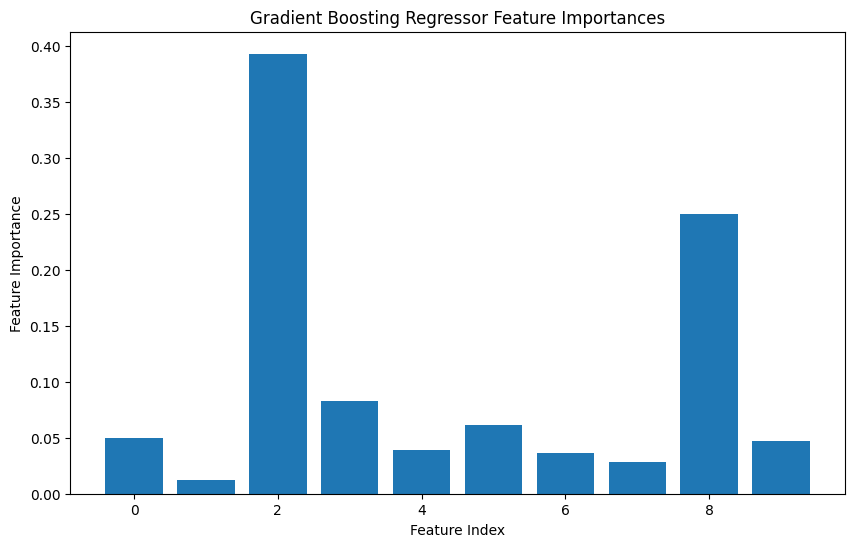

In [14]:
# prompt: use sklearn models and dataset to build a gradientboosting regression model and print and plot feature_importance..

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print feature importances
feature_importances = gbr.feature_importances_
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Gradient Boosting Regressor Feature Importances")
plt.show()